# 7. tf.data 사용하여 image & make batch

tf.data를 사용하면 generator사용하지 않는다. 
- 단점) 구현 하기가 복잡하다. 영상 처리 customize 다 직접해야함
- 장점) 국한 된 기능 뿐만 아니라 직접 customize해서 다양하게 돌려 볼 수 있다. 

In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_paths = glob('/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/*.png')
path = data_paths[0]

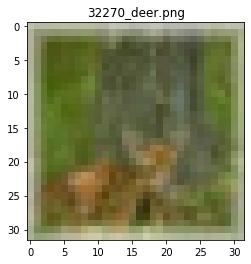

In [13]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

#시각화
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

### 1. tf.data 의 사용

In [15]:
data_paths[:10]

['/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/32270_deer.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/21851_cat.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/48309_deer.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/33547_truck.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/45202_automobile.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/2789_bird.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/24517_horse.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/15193_frog.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/10817_ship.png',
 '/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/49897_ship.png']

In [17]:
#함수 만들어서 사용
def get_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

#이러면 
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(get_image)

In [18]:
#dataset 중 하나(next사용)만 가져 와 본다. 
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

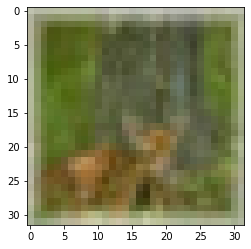

In [19]:
plt.imshow(tf_image)
plt.show()


### 2. Batch로 묶기
#### 이미지를 넣어 줄 때 하나씩 넣는 것이 아니라 batch 형태로 넣기 때문에 batch로 묶어 주는 것이 필요

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(get_image)
dataset = dataset.batch(batch_size=8)

In [25]:
#batch로 묶은 것의 처음 것만 가져와 보면, 
tf_image_batch = next(iter(dataset))

In [26]:
tf_image_batch.shape #[8, 32, 32, 3]로 batch_size = 8만큼 묶여 짐을 볼 수 있다. 

TensorShape([8, 32, 32, 3])

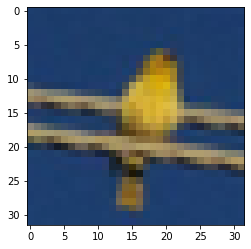

In [27]:
#시각화 
plt.imshow(tf_image_batch[5])
plt.show()

### 3. shuffle(random하게 데이터 섞어 주는 것) 하기

In [28]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(get_image)
dataset = dataset.batch(batch_size=32)
dataset = dataset.shuffle(buffer_size = len(data_paths))#buffer_size = 얼마나 하는지는 정해져 ㅇㅆ지 않지만 공식 홈페이지에는 데이터 개수만큼 넣어준다. 

순서보면
1. 데이터 경로
2. 이미지를 읽는 것
3. batch로 묶어주기
4. shuffle로 랜덤하게 섞어주기
5. 그리고 시각화 해서 결과보기

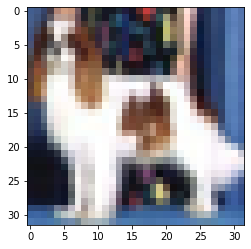

In [30]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[0])
plt.show() #deer가 아닌 강아지가 나오니 섞였다는 것을 알 수 있음

### 4. 이미지와 Label하고 같이 넣기

In [31]:
path

'/Users/jeonghyeonjeong/for github/인공지능_딥러닝_dataset/cifar/train/32270_deer.png'

In [32]:
path.split(sep = '_')[-1]

'deer.png'

In [34]:
path.split(sep = '_')[-1].replace('.png', '') #이렇게 label만 따로 나오게 할 수 있다. 

'deer'

In [37]:
#위의 과정을 함수화하면

def get_label(path):
    return path.split('_')[-1].replace('.png', '')


In [38]:
label_name = get_label(path)
label_name

'deer'

In [40]:
#전체 labels 한꺼번에 가져오기
labels = [get_label(path) for path in data_paths]
labels[:10]

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship']

In [41]:
#unique한 것만 보면
classes = np.unique(labels)
classes

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [46]:
#one hot encoding
##컴퓨터가 이해 할 수 있는 형태로 label 변환
onehot_encoding = np.array(classes == 'deer', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [45]:
#위와 같은 개념으로 할 것이라서 모든 label마다 해주기 위해 함수 만들고, 반복문 돌리면 

def onehot_encoding(label):
    return np.array(classes == label, np.uint8)

for label in classes:
    onehot_encoding(label)

아니면,  keras에서 제공하는 to_categorical 이용해도 됨

from tensorflow.keras.utils import to_categorical
onehot_encoding = to_categorical(label, len(classes)
                                (<-원래 label명, 전체 class 개수를 말함)

In [50]:
#이제 이미지와 onehot encoding 한 label을 함께 넣어준다. 

def get_image_label(path, labels):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label

dataset = tf.data.Dataset.from_tensor_slices((data_paths, labels))
dataset = dataset.map(get_image_label)
dataset = dataset.batch(batch_size = 32)
dataset = dataset.shuffle(buffer_size = len(data_paths))
dataset = dataset.repeat() #epoch가 반복해서 돌아갈 수 있도록 함    

In [52]:
image, label == next(iter(dataset))
image.shape, label.shape

(TensorShape([32, 32, 3]), ())

In [53]:
label[0]

't'

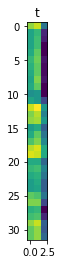

In [54]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()